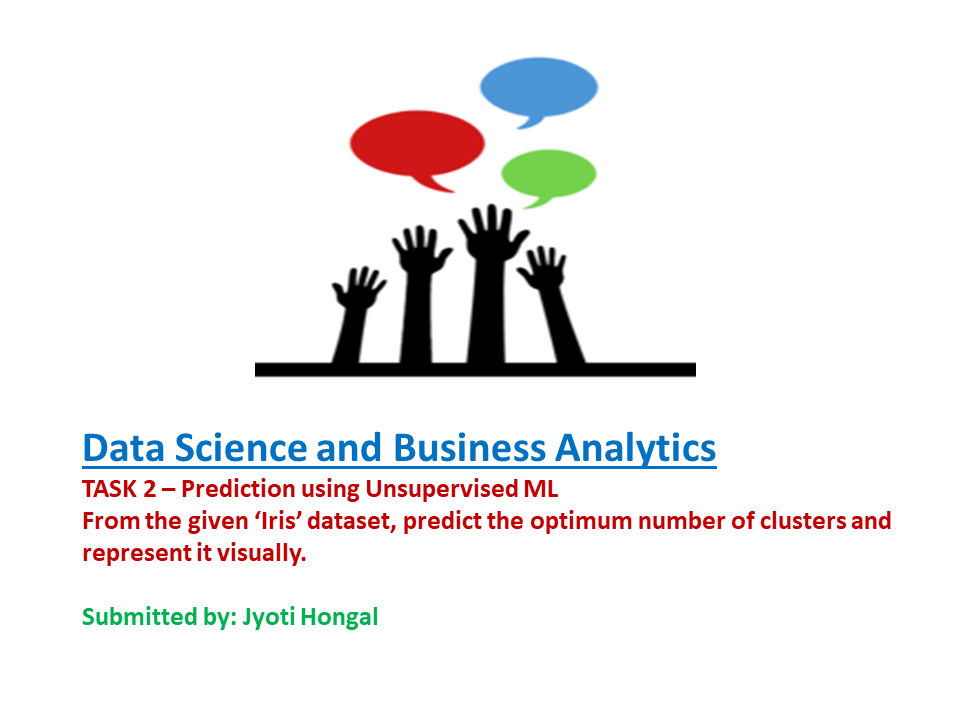

### UNSUPERVISED LEARNING

**Unsupervised learning** is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

### 1) IMPORT THE MODULES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### 2) LOAD THE DATA

In [3]:
df1 = datasets.load_iris()
df1.feature_names
df1.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
df1 = pd.DataFrame(df1.data, columns=df1.feature_names)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### k-means clustering method

**K-MEANS clustering** is a method from signal processing, with the objective of putting the observations into k clusters in which each observation belongs to a cluster with the nearest mean. 

### Using Elbow method

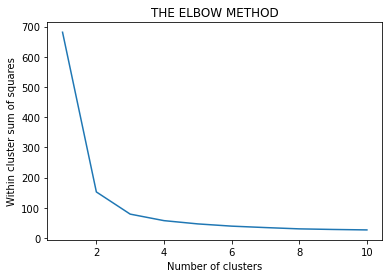

In [6]:
x = df1.iloc[:,].values
from sklearn.cluster import KMeans
res = []
for i in range(1,11):
    k = KMeans(n_clusters = i, init = 'k-means++',max_iter=30, n_init = 10, random_state=0, verbose=0)
    k.fit(x)
    res.append(k.inertia_)
    
plt.plot(range(1,11),res)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

Here, I have used the **elbow method** runs k-means clustering on the dataset for a range of values for k (from 1-10) and then for each value of k computes an average score for all clusters.

The basic idea behind this method is that it plots the various values of cost with changing k.

From the above graph, we can conclude that the **no. of clusters are 3.**

### Creating the k-means classifier

In [7]:
k = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = k.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

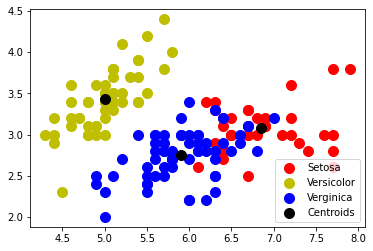

In [8]:
# Visualising the clusters - on first two columns
plt.scatter(x[y_means==0,0], x[y_means==0, 1],s=100,c='r', label='Setosa')
plt.scatter(x[y_means==1,0], x[y_means==1, 1],s=100,c='y', label='Versicolor')
plt.scatter(x[y_means==2,0], x[y_means==2, 1],s=100,c='b', label='Verginica')

# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=100, c='black', label='Centroids')

plt.legend()
plt.show()